# Assignment 7: Data Visualization

## Overview
This assignment covers the essential tools for data visualization: matplotlib fundamentals, seaborn statistical plots, pandas plotting, and visualization best practices.

## Setup

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

# Set style
plt.style.use('default')
sns.set_style('whitegrid')

# Create output directory
os.makedirs('output', exist_ok=True)

## Question 1: matplotlib Fundamentals

### Part 1.1: Basic Figures and Subplots

**TODO: Create a figure with 2x2 subplots showing different plot types**

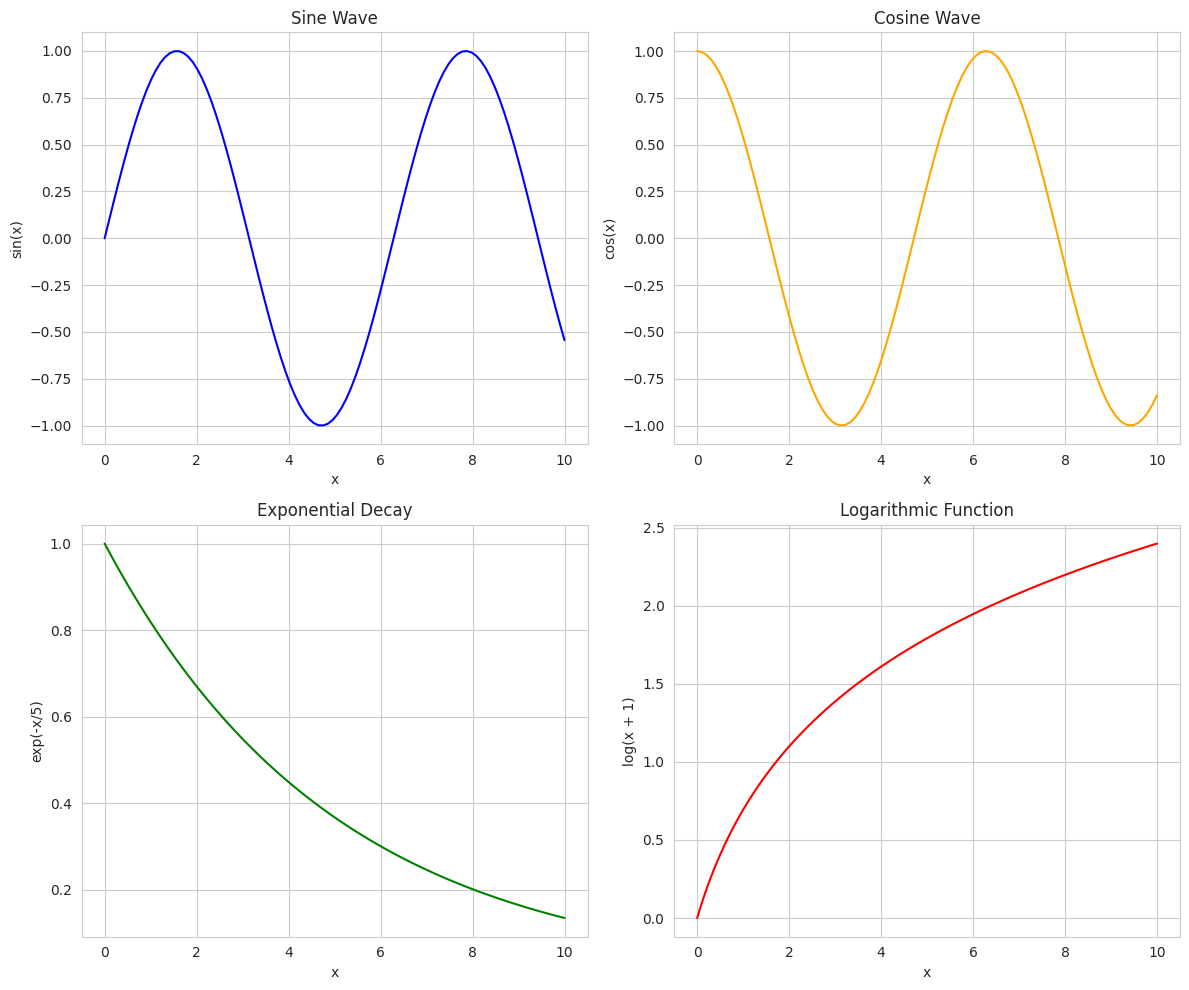

In [34]:
# Create sample data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.exp(-x/5)
y4 = np.log(x + 1)

# TODO: Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# TODO: Plot on each subplot
# Top-left: Sine wave
# Top-right: Cosine wave  
# Bottom-left: Exponential decay
# Bottom-right: Logarithmic function
axes[0, 0].plot(x, y1, color='blue')
axes[0, 1].plot(x, y2, color='orange')
axes[1, 0].plot(x, y3, color='green')
axes[1, 1].plot(x, y4, color='red')

# TODO: Add titles and labels to each subplot
# TODO: Add grid to each subplot
# TODO: Use tight_layout() to prevent overlapping
titles = ['Sine Wave', 'Cosine Wave', 'Exponential Decay', 'Logarithmic Function']
y_labels = ['sin(x)', 'cos(x)', 'exp(-x/5)', 'log(x + 1)']
for i in range(2):
   for j in range(2):
       axes[i, j].set_title(titles[i * 2 + j])
       axes[i, j].set_xlabel('x')
       axes[i, j].set_ylabel(y_labels[i * 2 + j])
       axes[i, j].grid(True)
plt.tight_layout()
plt.savefig('output/q1_matplotlib_plots.png', dpi=300, bbox_inches='tight')

plt.show()

### Part 1.2: Plot Customization

**TODO: Create a customized line plot with multiple series**

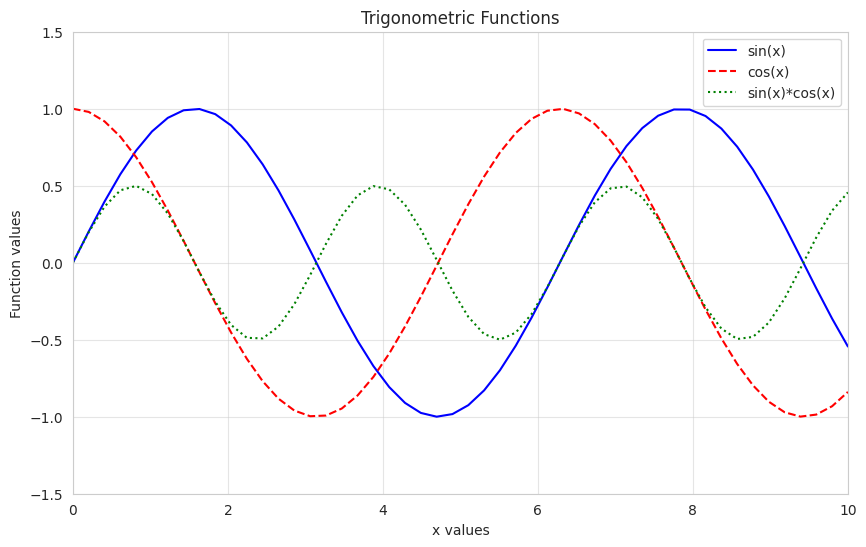

In [35]:
# Create sample data
x = np.linspace(0, 10, 50)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.sin(x) * np.cos(x)

# TODO: Create a figure with custom styling
fig, ax = plt.subplots(figsize=(10, 6))

# TODO: Plot three lines with different styles
# Line 1: Solid line, blue color, label 'sin(x)'
# Line 2: Dashed line, red color, label 'cos(x)'  
# Line 3: Dotted line, green color, label 'sin(x)*cos(x)'

# TODO: Add title, xlabel, ylabel
# TODO: Add legend
# TODO: Add grid with transparency
# TODO: Set appropriate axis limits
ax.plot(x, y1, linestyle='-', color='blue', label='sin(x)')
ax.plot(x, y2, linestyle='--', color='red', label='cos(x)')
ax.plot(x, y3, linestyle=':', color='green', label='sin(x)*cos(x)')
ax.set_title('Trigonometric Functions')
ax.set_xlabel('x values')
ax.set_ylabel('Function values')
ax.legend()
ax.grid(alpha=0.5)
ax.set_xlim(0, 10)
ax.set_ylim(-1.5, 1.5)

plt.show()

### Part 1.3: Different Plot Types

**TODO: Create a comprehensive visualization with multiple plot types**

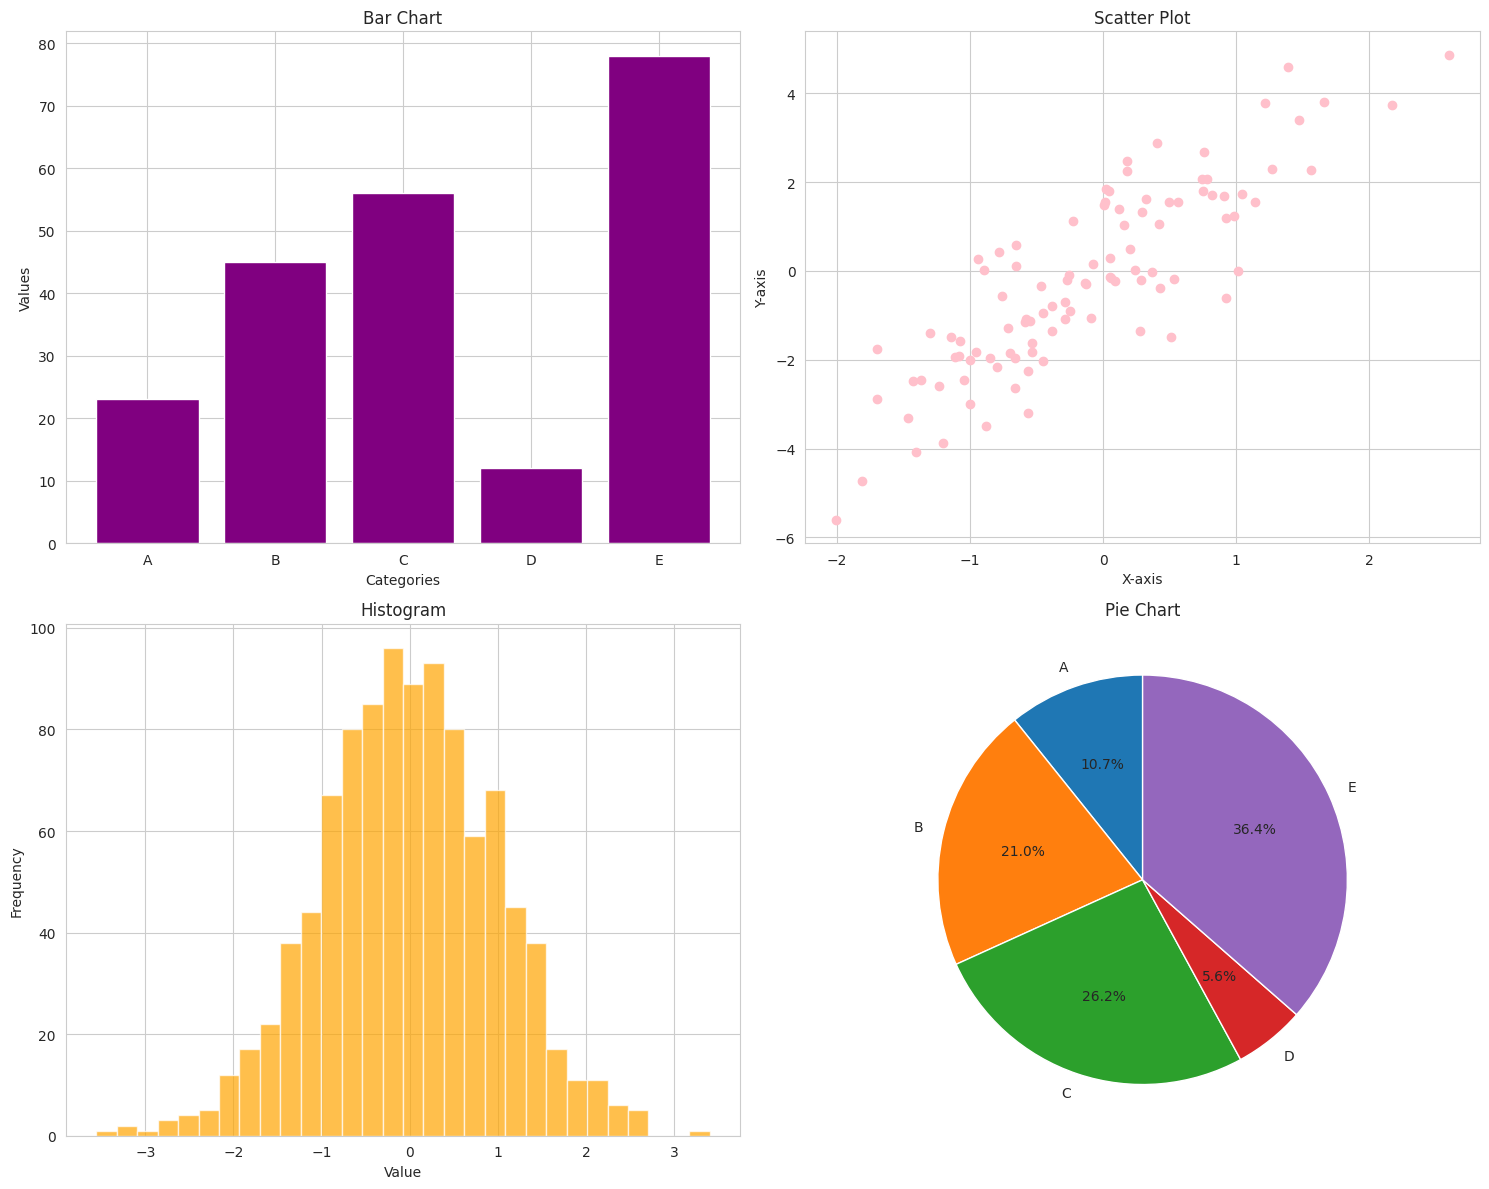

In [36]:
# Create sample data
categories = ['A', 'B', 'C', 'D', 'E']
values = [23, 45, 56, 12, 78]
x_scatter = np.random.randn(100)
y_scatter = 2 * x_scatter + np.random.randn(100)
hist_data = np.random.normal(0, 1, 1000)

# TODO: Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# TODO: Top-left: Bar chart
# TODO: Top-right: Scatter plot
# TODO: Bottom-left: Histogram
# TODO: Bottom-right: Pie chart

# TODO: Add appropriate titles and labels
# TODO: Customize colors and styles
# TODO: Save the plot as 'output/q1_matplotlib_plots.png'
# Top-left: Bar chart
axes[0, 0].bar(categories, values, color='purple')
axes[0, 0].set_title('Bar Chart')
axes[0, 0].set_xlabel('Categories')
axes[0, 0].set_ylabel('Values')

# Top-right: Scatter plot
axes[0, 1].scatter(x_scatter, y_scatter, color='pink')
axes[0, 1].set_title('Scatter Plot')
axes[0, 1].set_xlabel('X-axis')
axes[0, 1].set_ylabel('Y-axis')

# Bottom-left: Histogram
axes[1, 0].hist(hist_data, bins=30, color='orange', alpha=0.7)
axes[1, 0].set_title('Histogram')
axes[1, 0].set_xlabel('Value')
axes[1, 0].set_ylabel('Frequency')

# Bottom-right: Pie chart
axes[1, 1].pie(values, labels=categories, autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Pie Chart')

plt.tight_layout()
plt.savefig('output/q1_multi_panel.png', dpi=300, bbox_inches='tight')
plt.show()

## Question 2: seaborn Statistical Visualization

### Part 2.1: Load and Explore Data

In [37]:
# Load the sales data
sales_df = pd.read_csv('data/sales_data.csv')
customer_df = pd.read_csv('data/customer_data.csv')
product_df = pd.read_csv('data/product_data.csv')

# Merge data for analysis
merged_df = sales_df.merge(customer_df, on='customer_id').merge(product_df, on='product_id')

print("Data shape:", merged_df.shape)
print("\nColumns:", merged_df.columns.tolist())
print("\nFirst few rows:")
print(merged_df.head())

Data shape: (1000, 19)

Columns: ['transaction_id', 'customer_id', 'product_id', 'quantity', 'unit_price_x', 'total_amount', 'transaction_date', 'store_location', 'customer_name', 'age', 'gender', 'city', 'state', 'registration_date', 'product_name', 'category', 'brand', 'unit_price_y', 'stock_quantity']

First few rows:
  transaction_id customer_id product_id  quantity  unit_price_x  total_amount  \
0          T0001       C0103       P040        10    229.359978   2293.599785   
1          T0002       C0180       P083         3     75.794677    227.384031   
2          T0003       C0093       P042         5    479.387719   2396.938597   
3          T0004       C0015       P041         5    269.533265   1347.666324   
4          T0005       C0107       P006         4    128.527714    514.110856   

  transaction_date store_location customer_name  age gender         city  \
0       2025-10-14          South  Customer 103   23      F       Dallas   
1       2025-07-26          North  Cus

### Part 2.2: Statistical Plots

**TODO: Create statistical visualizations with seaborn**

/tmp/ipykernel_14784/4137272955.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='store_location', y='total_amount', data=merged_df, ax=axes[0, 0], palette='Set2')
/tmp/ipykernel_14784/4137272955.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='category', y='total_amount', data=merged_df, ax=axes[0, 1], palette='Set3')


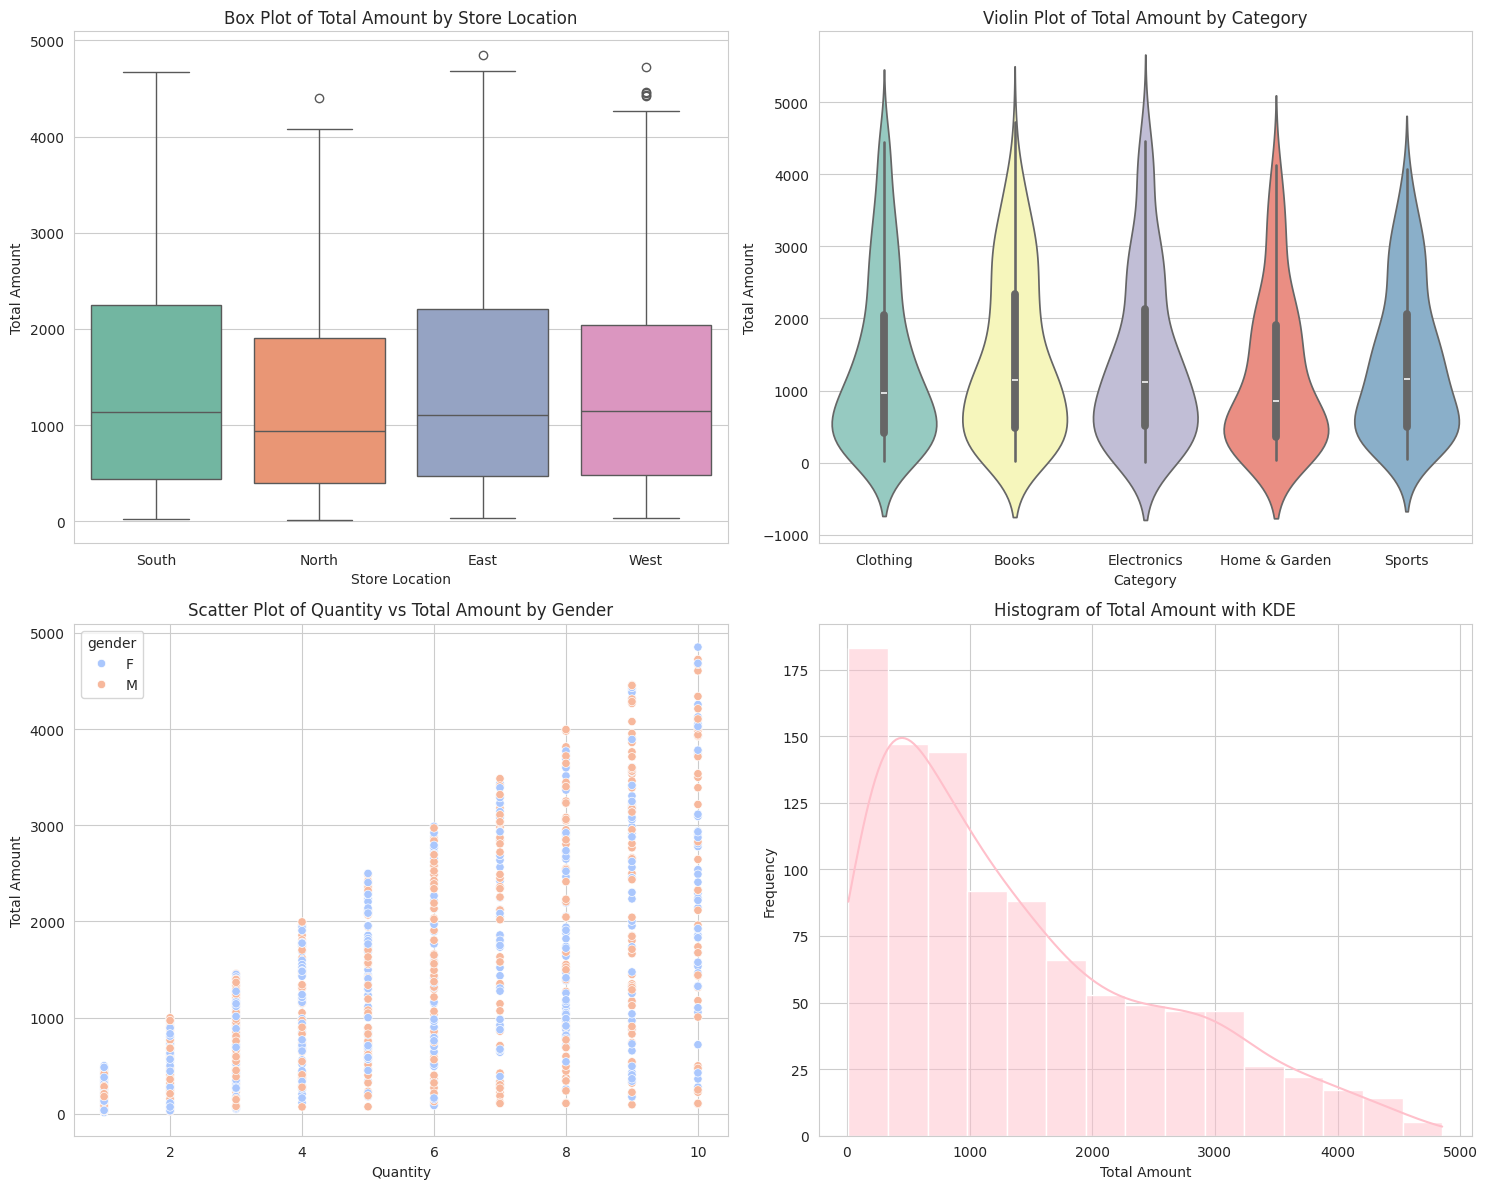

In [38]:
# TODO: Create a figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# TODO: Top-left: Box plot of total_amount by store_location
# TODO: Top-right: Violin plot of total_amount by category
# TODO: Bottom-left: Scatter plot of quantity vs total_amount with hue by gender
# TODO: Bottom-right: Histogram of total_amount with kde overlay

# TODO: Add appropriate titles and labels
# TODO: Customize colors and styling
# TODO: Save the plot as 'output/q2_seaborn_plots.png'
# Top-left: Box plot of total_amount by store_location
sns.boxplot(x='store_location', y='total_amount', data=merged_df, ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Box Plot of Total Amount by Store Location')
axes[0, 0].set_xlabel('Store Location')
axes[0, 0].set_ylabel('Total Amount')

# Top-right: Violin plot of total_amount by category
sns.violinplot(x='category', y='total_amount', data=merged_df, ax=axes[0, 1], palette='Set3')
axes[0, 1].set_title('Violin Plot of Total Amount by Category')
axes[0, 1].set_xlabel('Category')
axes[0, 1].set_ylabel('Total Amount')

# Bottom-left: Scatter plot of quantity vs total_amount with hue by gender
sns.scatterplot(x='quantity', y='total_amount', hue='gender', data=merged_df, ax=axes[1, 0], palette='coolwarm')
axes[1, 0].set_title('Scatter Plot of Quantity vs Total Amount by Gender')
axes[1, 0].set_xlabel('Quantity')
axes[1, 0].set_ylabel('Total Amount')

# Bottom-right: Histogram of total_amount with kde overlay
sns.histplot(merged_df['total_amount'], kde=True, ax=axes[1, 1], color='pink')
axes[1, 1].set_title('Histogram of Total Amount with KDE')
axes[1, 1].set_xlabel('Total Amount')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('output/q2_seaborn_plots.png', dpi=300, bbox_inches='tight')
plt.show()

### Part 2.3: Correlation Analysis

**TODO: Create a correlation heatmap**

Available columns: ['transaction_id', 'customer_id', 'product_id', 'quantity', 'unit_price_x', 'total_amount', 'transaction_date', 'store_location', 'customer_name', 'age', 'gender', 'city', 'state', 'registration_date', 'product_name', 'category', 'brand', 'unit_price_y', 'stock_quantity']
Data types:
transaction_id        object
customer_id           object
product_id            object
quantity               int64
unit_price_x         float64
total_amount         float64
transaction_date      object
store_location        object
customer_name         object
age                    int64
gender                object
city                  object
state                 object
registration_date     object
product_name          object
category              object
brand                 object
unit_price_y         float64
stock_quantity         int64
dtype: object


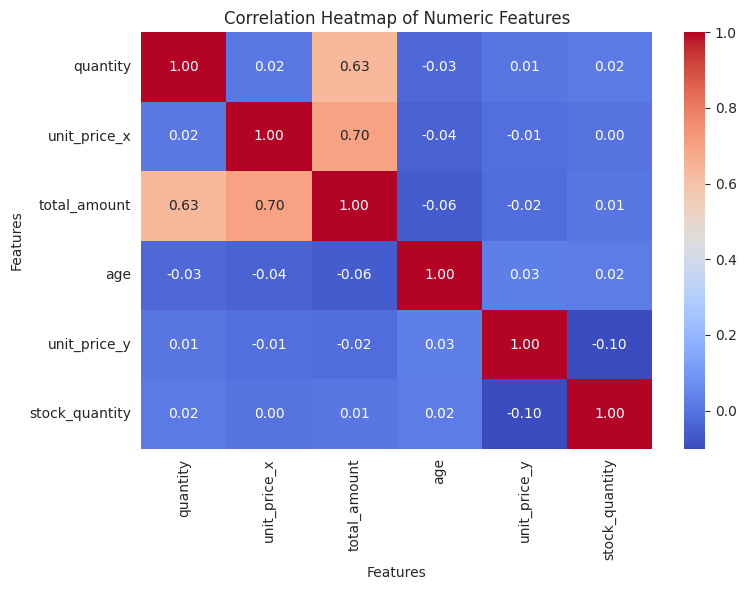

In [39]:
# TODO: Select numeric columns for correlation analysis
# First, explore the merged data to see what columns are available
print("Available columns:", merged_df.columns.tolist())
print("Data types:")
print(merged_df.dtypes)

# TODO: Select only the numeric columns that exist for correlation analysis
# Hint: After merging, pandas adds _x and _y suffixes to duplicate column names
numeric_cols = ['quantity', 'unit_price_x', 'total_amount', 'age', 'unit_price_y', 'stock_quantity']  # Fill this with the appropriate column names

# TODO: Calculate correlation matrix
# correlation_matrix = ...
correlation_matrix = merged_df[numeric_cols].corr()

# TODO: Create heatmap with seaborn
# TODO: Add title and customize appearance
# TODO: Save the plot as 'output/q2_correlation_heatmap.png'
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Numeric Features')
plt.xlabel('Features')
plt.ylabel('Features')

plt.tight_layout()
plt.savefig('output/q2_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

## Question 3: pandas Plotting and Data Exploration

### Part 3.1: Time Series Visualization

**TODO: Create time series plots with pandas**

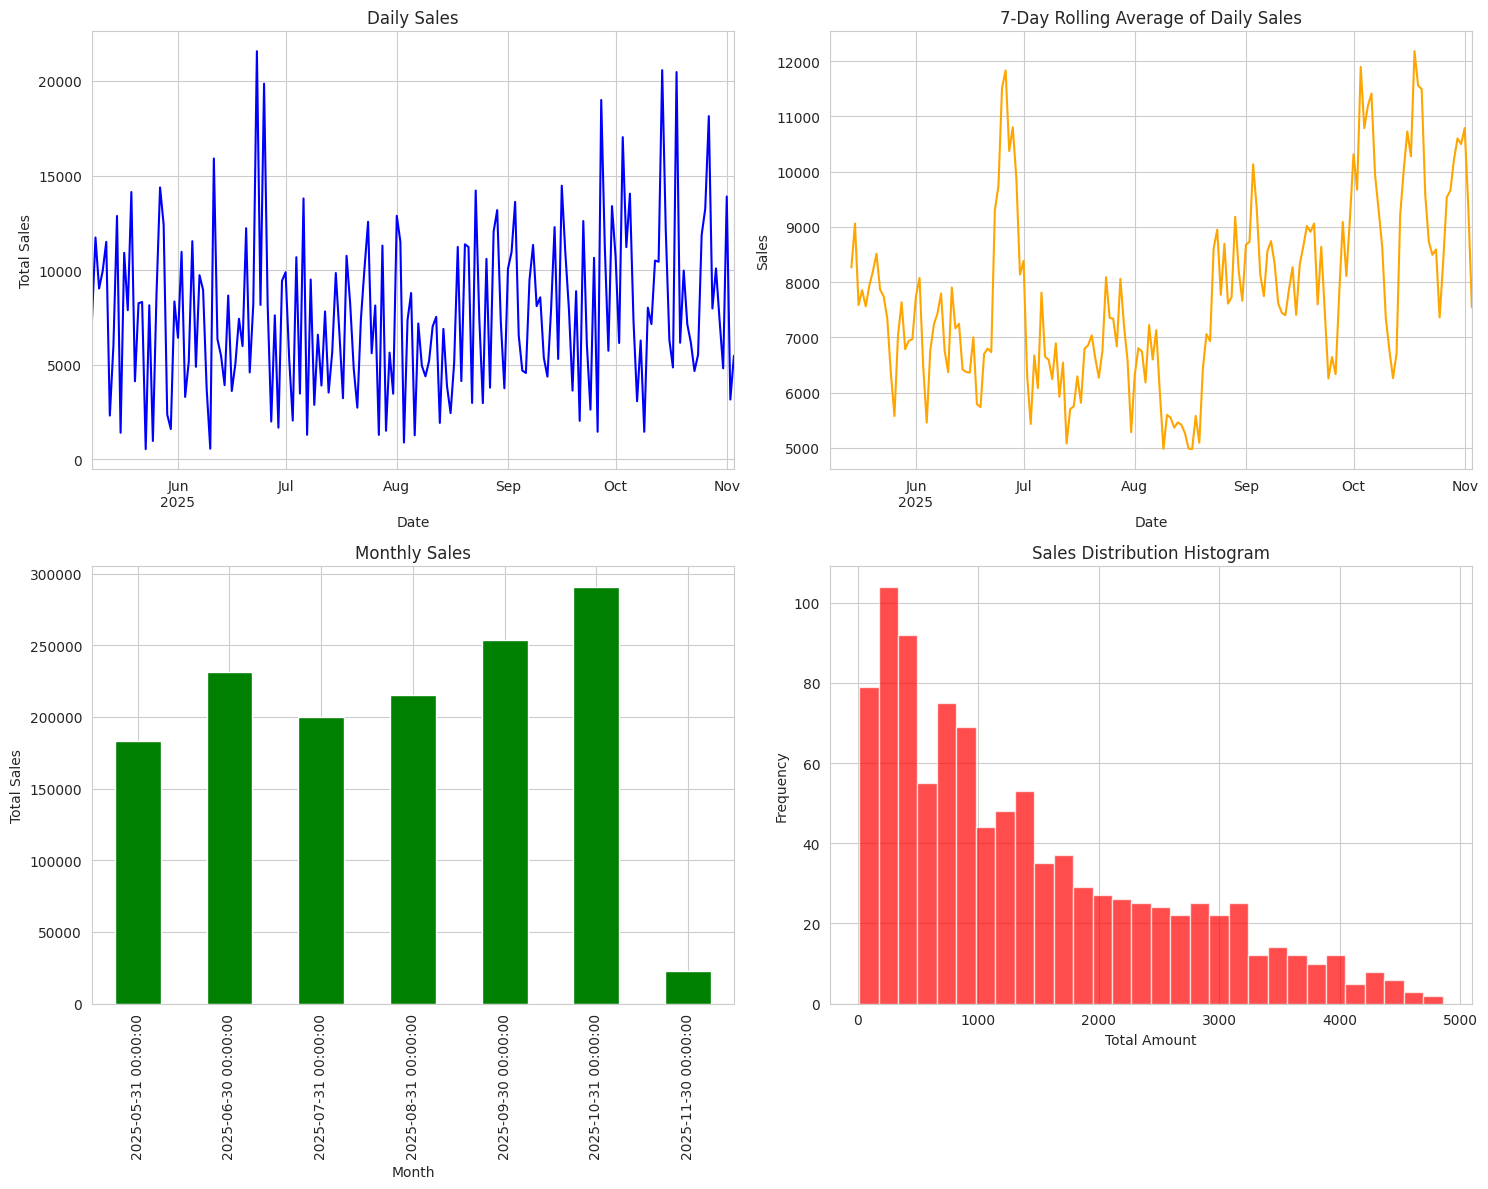

In [40]:
# TODO: Convert transaction_date to datetime
# merged_df['transaction_date'] = pd.to_datetime(merged_df['transaction_date'])
merged_df['transaction_date'] = pd.to_datetime(merged_df['transaction_date'])

# TODO: Create daily sales aggregation
# daily_sales = merged_df.groupby('transaction_date')['total_amount'].sum()
daily_sales = merged_df.groupby('transaction_date')['total_amount'].sum()

# TODO: Create a figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# TODO: Top-left: Line plot of daily sales
# TODO: Top-right: Rolling 7-day average
# TODO: Bottom-left: Monthly sales bar chart (use resample('ME') for month-end frequency)
# TODO: Bottom-right: Sales distribution histogram

# TODO: Add titles and labels
# TODO: Save the plot as 'output/q3_pandas_plots.png'
# Top-left: Line plot of daily sales
daily_sales = merged_df.groupby('transaction_date')['total_amount'].sum()
daily_sales.plot(ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Daily Sales')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Total Sales')

# Top-right: Rolling 7-day average
rolling_avg = daily_sales.rolling(window=7).mean()
rolling_avg.plot(ax=axes[0, 1], color='orange')
axes[0, 1].set_title('7-Day Rolling Average of Daily Sales')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Sales')

# Bottom-left: Monthly sales bar chart
monthly_sales = daily_sales.resample('ME').sum()
monthly_sales.plot(kind='bar', ax=axes[1, 0], color='green')
axes[1, 0].set_title('Monthly Sales')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Total Sales')

# Bottom-right: Sales distribution histogram
merged_df['total_amount'].plot(kind='hist', bins=30, ax=axes[1, 1], color='red', alpha=0.7)
axes[1, 1].set_title('Sales Distribution Histogram')
axes[1, 1].set_xlabel('Total Amount')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('output/q3_pandas_plots.png', dpi=300, bbox_inches='tight')
plt.show()

### Part 3.2: Data Overview Dashboard

**TODO: Create a comprehensive data overview**

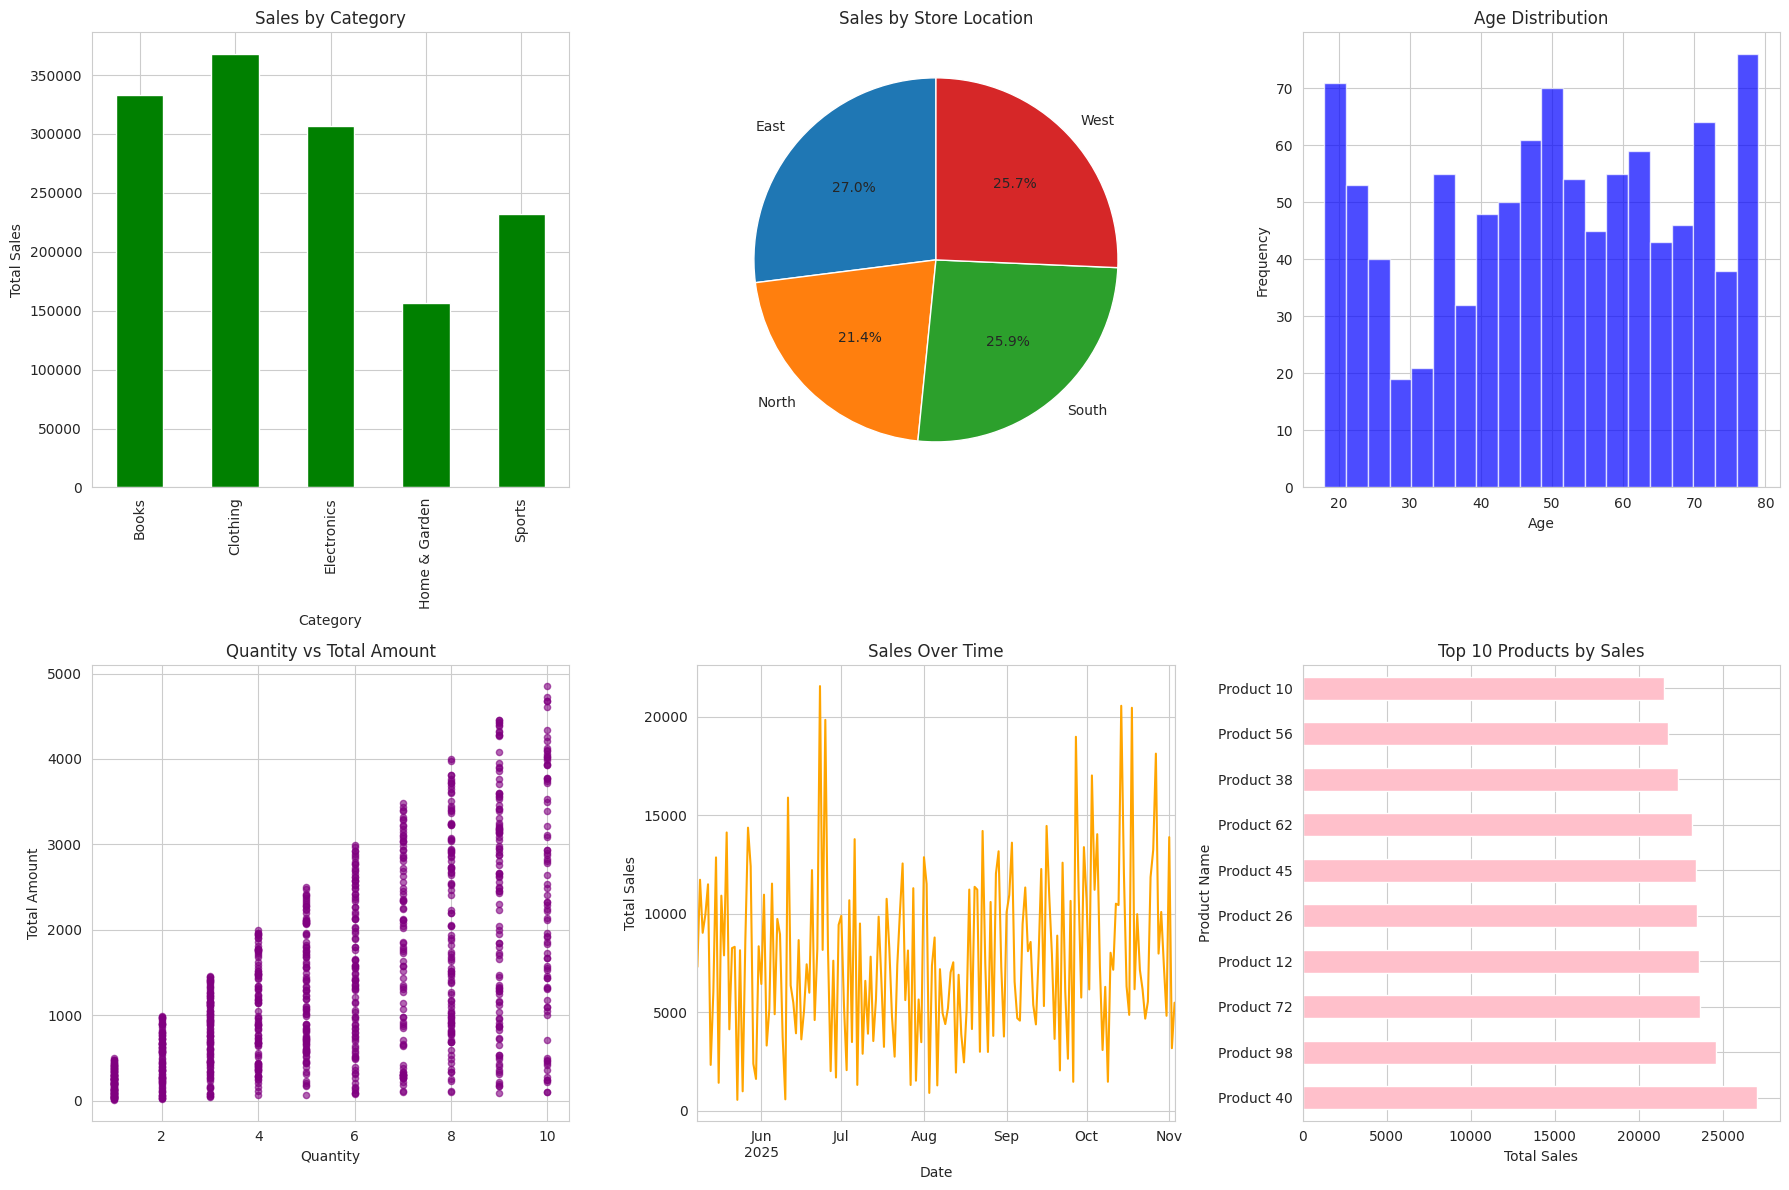

In [41]:
# TODO: Create a figure with multiple subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# TODO: Plot 1: Sales by category (bar chart)
# TODO: Plot 2: Sales by store location (pie chart)
# TODO: Plot 3: Age distribution (histogram)
# TODO: Plot 4: Quantity vs total_amount scatter
# TODO: Plot 5: Sales over time (line plot)
# TODO: Plot 6: Top 10 products by sales (horizontal bar)

# TODO: Add titles and customize appearance
# TODO: Save the plot as 'output/q3_data_overview.png'
# Plot 1: Sales by category (bar chart)
category_sales = merged_df.groupby('category')['total_amount'].sum()
category_sales.plot(kind='bar', ax=axes[0, 0], color='green')
axes[0, 0].set_title('Sales by Category')
axes[0, 0].set_xlabel('Category')
axes[0, 0].set_ylabel('Total Sales')

# Plot 2: Sales by store location (pie chart)
store_sales = merged_df.groupby('store_location')['total_amount'].sum()
store_sales.plot(kind='pie', ax=axes[0, 1], autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('Sales by Store Location')
axes[0, 1].set_ylabel('')

# Plot 3: Age distribution (histogram)
merged_df['age'].plot(kind='hist', bins=20, ax=axes[0, 2], color='blue', alpha=0.7)
axes[0, 2].set_title('Age Distribution')
axes[0, 2].set_xlabel('Age')
axes[0, 2].set_ylabel('Frequency')

# Plot 4: Quantity vs total_amount scatter
merged_df.plot(kind='scatter', x='quantity', y='total_amount', ax=axes[1, 0], color='purple', alpha=0.6)
axes[1, 0].set_title('Quantity vs Total Amount')
axes[1, 0].set_xlabel('Quantity')
axes[1, 0].set_ylabel('Total Amount')

# Plot 5: Sales over time (line plot)
daily_sales.plot(ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Sales Over Time')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Total Sales')

# Plot 6: Top 10 products by sales (horizontal bar)
top_products = merged_df.groupby('product_name')['total_amount'].sum().nlargest(10)
top_products.plot(kind='barh', ax=axes[1, 2], color='pink')
axes[1, 2].set_title('Top 10 Products by Sales')
axes[1, 2].set_xlabel('Total Sales')
axes[1, 2].set_ylabel('Product Name')

plt.tight_layout()
plt.savefig('output/q3_data_overview.png', dpi=300, bbox_inches='tight')
plt.show()

## Submission Checklist

Before submitting, verify you've created:

- [ ] `output/q1_matplotlib_plots.png` - matplotlib fundamentals
- [ ] `output/q1_multi_panel.png` - multi-panel visualization  
- [ ] `output/q2_seaborn_plots.png` - seaborn statistical plots
- [ ] `output/q2_correlation_heatmap.png` - correlation analysis
- [ ] `output/q3_pandas_plots.png` - pandas plotting
- [ ] `output/q3_data_overview.png` - data exploration

## Key Learning Objectives

- Master matplotlib fundamentals for custom plots
- Create statistical visualizations with seaborn
- Use pandas plotting for quick exploration
- Apply visualization best practices
- Choose appropriate chart types for different data